<a href="https://colab.research.google.com/github/codeRushhh/SMS_Spam_Detection/blob/main/NLP_sms_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [737]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, precision_score
from sklearn.ensemble import AdaBoostClassifier

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [738]:
df=pd.read_csv('/content/spam.csv',encoding='ISO-8859-1')
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [739]:
df.shape

(5572, 5)

**Data Cleaning**

In [740]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [741]:
# droppimg the last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [742]:
df.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [743]:
# renaming columns v1 and v2
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)

In [744]:
df.head(10)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [745]:
# checking for missing values
df.isna().sum()

target    0
text      0
dtype: int64

In [746]:
df['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

In [747]:
# applying label encoder
en=LabelEncoder()
df['target']=en.fit_transform(df['target'])

In [748]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [749]:
# checking for missing values
df.isna().sum()

target    0
text      0
dtype: int64

In [750]:
# checking for duplicate values
df.duplicated().sum()

403

In [751]:
# removing the duplicates
df=df.drop_duplicates(keep='first')

In [752]:
df.duplicated().sum()

0

In [753]:
df.shape

(5169, 2)

# **Exploratory Data Analysis**

In [754]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [755]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

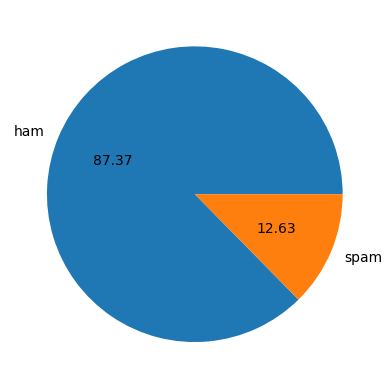

In [756]:
#plotting values of target
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

from the graph we can clearly say that the data is imbalanced

In [757]:
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [758]:
#cheching for the no of characters in each rows and making it as a column 'no_of__characters'
df['no_of__characters']=df['text'].apply(len)
df.head()

,target,text,no_of__characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [759]:
#cheching for the no of words in each rows and making it as a column 'no_of__words'
df['no_of__words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,target,text,no_of__characters,no_of__words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [760]:
#cheching for the no of sentences in each rows and making it as a column 'no_of_sent'
df['no_of__sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,no_of__characters,no_of__words,no_of__sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [761]:
#describing the colums
df[['no_of__characters','no_of__words','no_of__sent']].describe()

,no_of__characters,no_of__words,no_of__sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [762]:
#describing the colums for ham messages
df[df['target']==0][['no_of__characters','no_of__words','no_of__sent']].describe()

,no_of__characters,no_of__words,no_of__sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [763]:
#describing the colums for  messages
df[df['target']==1][['no_of__characters','no_of__words','no_of__sent']].describe()

,no_of__characters,no_of__words,no_of__sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='no_of__characters', ylabel='Count'>

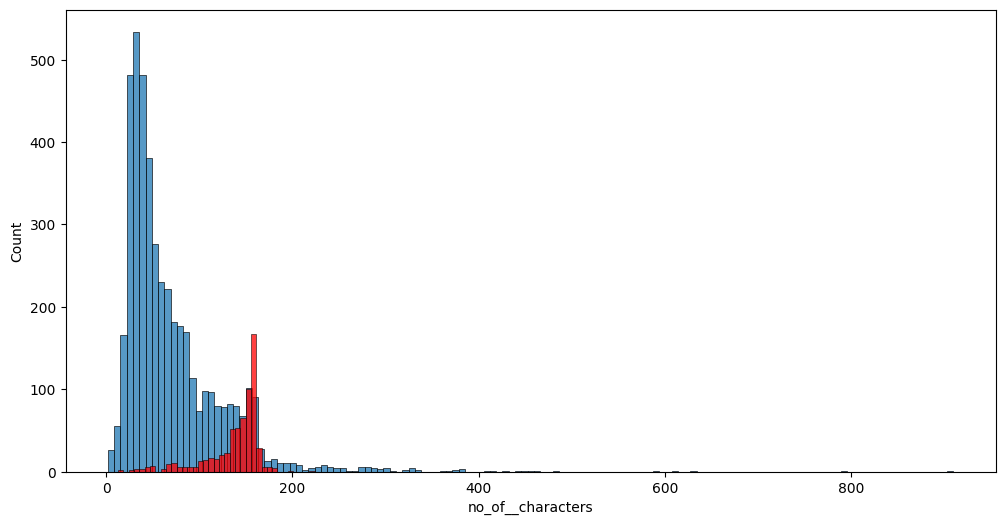

In [764]:
#creating a histogram for ham and spam
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['no_of__characters'])
sns.histplot(df[df['target']==1]['no_of__characters'],color='red')

<Axes: xlabel='no_of__words', ylabel='Count'>

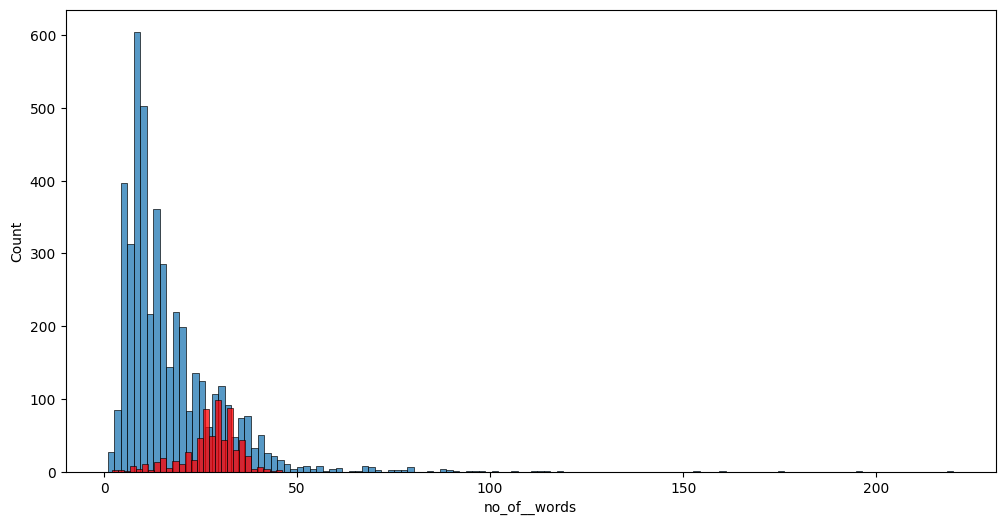

In [765]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['no_of__words'])
sns.histplot(df[df['target']==1]['no_of__words'],color='red')

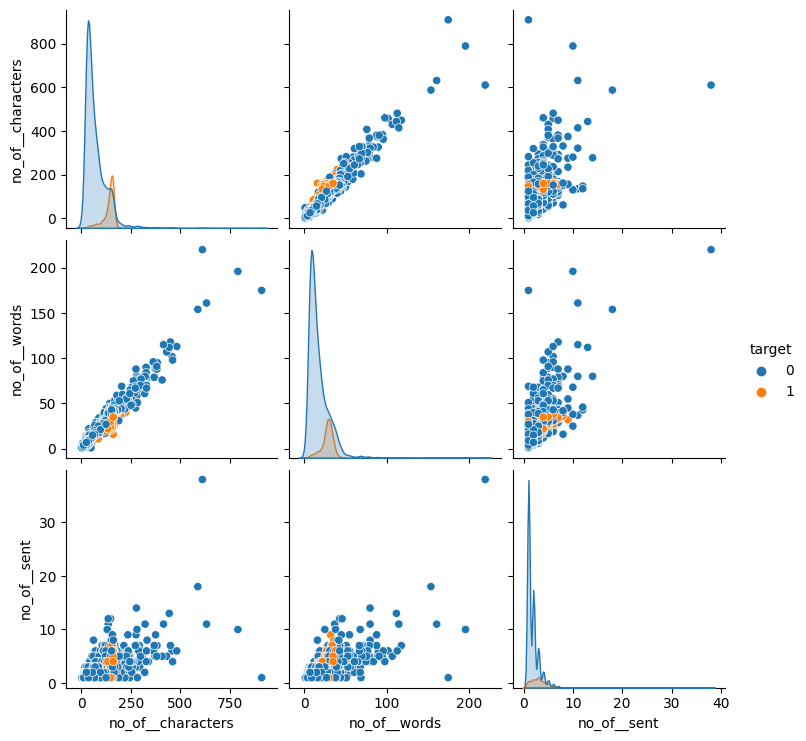

In [766]:
sns.pairplot(data=df, hue='target')

<Axes: >

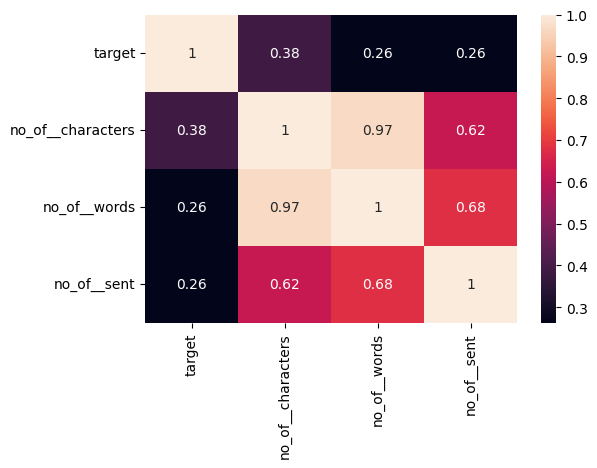

In [767]:
#plotting the correlation using a heat map
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True)

#Data Preprocessing

In [768]:
# 1.converting the data(text) into lowercase
# 2.Tokenization
# 3.Remove special characters
# 4.Remove Stopwords
# 5.Stemming
# all these are done in a single step---> by creating a function transform 

stopwords.words('english')
string.punctuation
ps=PorterStemmer()


def transform(text):
  text=text.lower()        #--------> converting text to lower case
  text=nltk.word_tokenize(text)      #-------> word Tokenizing

  y=[]              #-------> removing special characters
  for i in text:
    if i.isalnum():
      y.append(i)
  
  text=y[:]     #---->cloning
  y.clear()

  for i in text:      #------>removing stopwords / punctuations
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]    #------> cloning
  y.clear()

  for i in text:      #-----> Stemming
    y.append(ps.stem(i))
  
  return " ".join(y)

  



In [769]:
#creating a new colum "transformed_text"
df['text'].apply(transform)
df['transformed_text']=df['text'].apply(transform)
df.head()

,target,text,no_of__characters,no_of__words,no_of__sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [770]:
#using word cloud to show the frequently used spam words
wc=WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [771]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

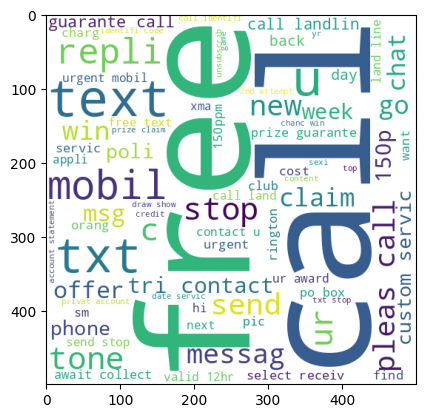

In [772]:
plt.imshow(spam_wc)

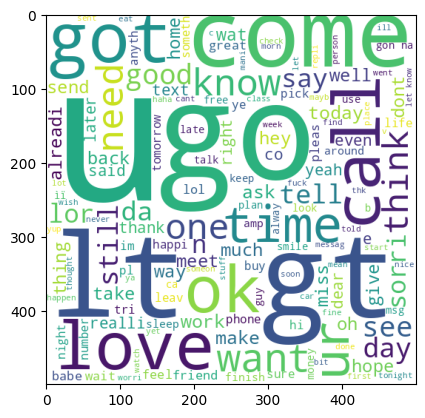

In [773]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [774]:
df.head()

,target,text,no_of__characters,no_of__words,no_of__sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [775]:
#using collection moduel  to find the most used words in ham and spam
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [776]:
#ham
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [777]:
len(spam_corpus)

9939

In [778]:
len(ham_corpus)

35404

In [779]:
#listing out the 30 most commonly used words in a spam message
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

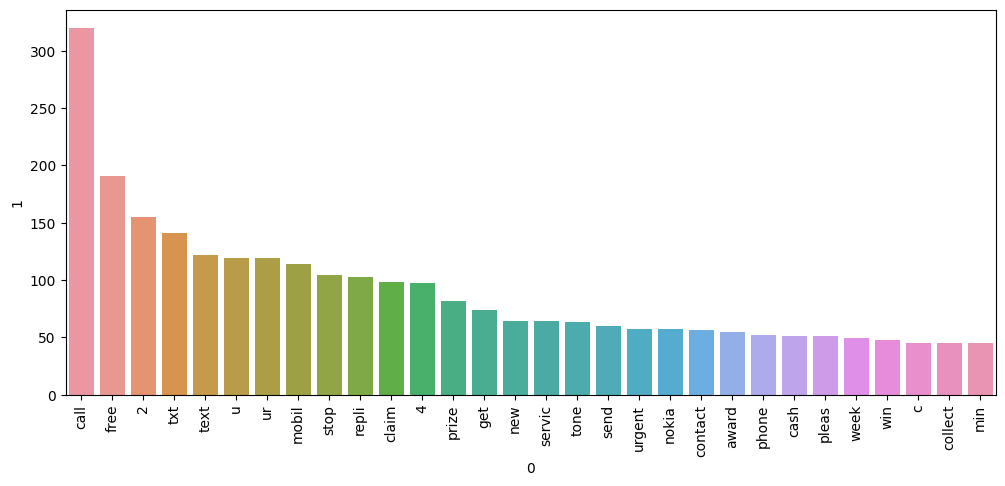

In [780]:
#ploting the 30 most commonly used in a spam message
plt.figure(figsize=(12,5))
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y= pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [781]:
#listing out the 30 most commonly used words in a ham message
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

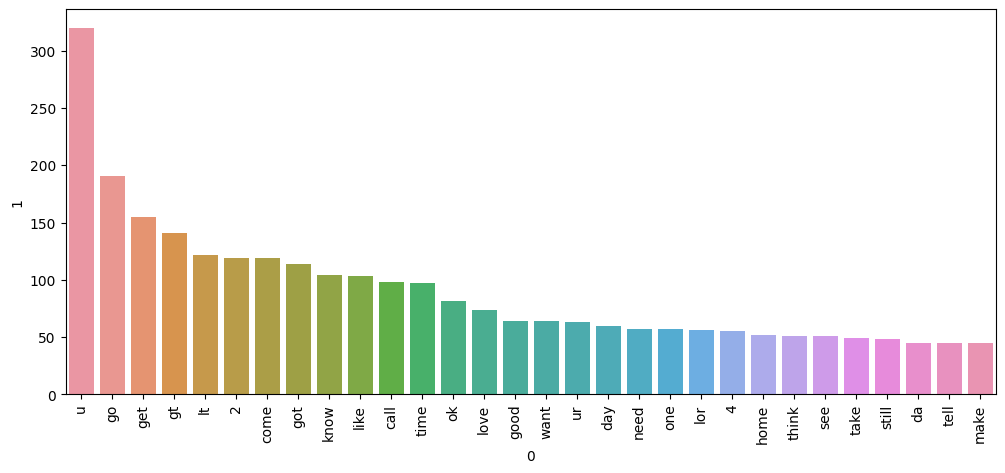

In [782]:
#ploting the 30 most commonly used in a ham message
plt.figure(figsize=(12,5))
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y= pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building 

In [783]:
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [784]:
X=tfidf.fit_transform(df['transformed_text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [785]:
X.shape

(5169, 6708)

In [786]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [787]:
#train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=.2, random_state=1)

In [734]:
#AdaBoostClassifier
ab=AdaBoostClassifier()
ab.fit(X_train,y_train)
y_pred=ab.predict(X_test)

accuracy score : 0.9555125725338491
ConfusionMatrixDisplay : <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fc904f5a800>
precision_score: 0.9238095238095239


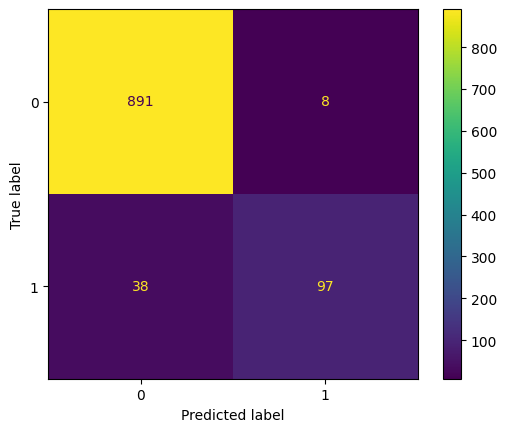

In [735]:
print('accuracy score :', accuracy_score(y_test,y_pred))
print('ConfusionMatrixDisplay :', ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('precision_score:', precision_score(y_test,y_pred))

In [736]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(ab,open('model.pkl','wb'))